In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dataset import OcelotSpaceChargeQuadrupoleDataset

In [2]:
dataset = OcelotSpaceChargeQuadrupoleDataset(stage="validation", normalize=False)

In [3]:
energies = []
charges = []
sigma_xs = []

sigma_x_errors = []
sigma_xp_errors = []
sigma_y_errors = []
sigma_yp_errors = []
sigma_s_errors = []
sigma_p_errors = []
for (incoming, controls), outgoing_deltas in dataset:
    energies.append(incoming[7])
    charges.append(incoming[6])
    sigma_xs.append(incoming[0])

    sigma_x_errors.append(outgoing_deltas[0])
    sigma_xp_errors.append(outgoing_deltas[1])
    sigma_y_errors.append(outgoing_deltas[2])
    sigma_yp_errors.append(outgoing_deltas[3])
    sigma_s_errors.append(outgoing_deltas[4])
    sigma_p_errors.append(outgoing_deltas[5])

In [4]:
np.array(sigma_xs).min(), np.array(sigma_xs).mean(), np.array(sigma_xs).max()

(1.0488374e-05, 0.00050223287, 0.0010001959)

In [5]:
np.array(sigma_x_errors).min(), np.array(sigma_x_errors).mean(), np.array(
    sigma_x_errors
).max()

(-0.0001489893, 5.0967614e-05, 0.03390144)

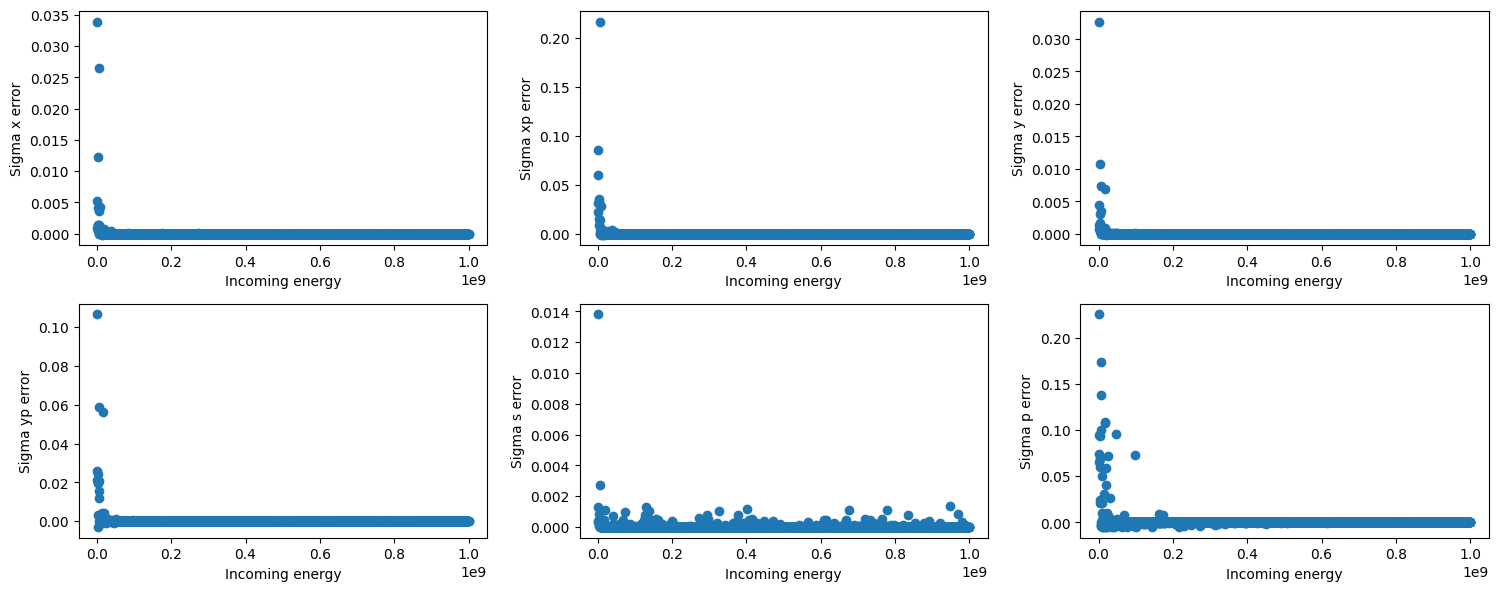

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(energies, sigma_x_errors)
plt.xlabel("Incoming energy")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(energies, sigma_xp_errors)
plt.xlabel("Incoming energy")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(energies, sigma_y_errors)
plt.xlabel("Incoming energy")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(energies, sigma_yp_errors)
plt.xlabel("Incoming energy")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(energies, sigma_s_errors)
plt.xlabel("Incoming energy")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(energies, sigma_p_errors)
plt.xlabel("Incoming energy")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

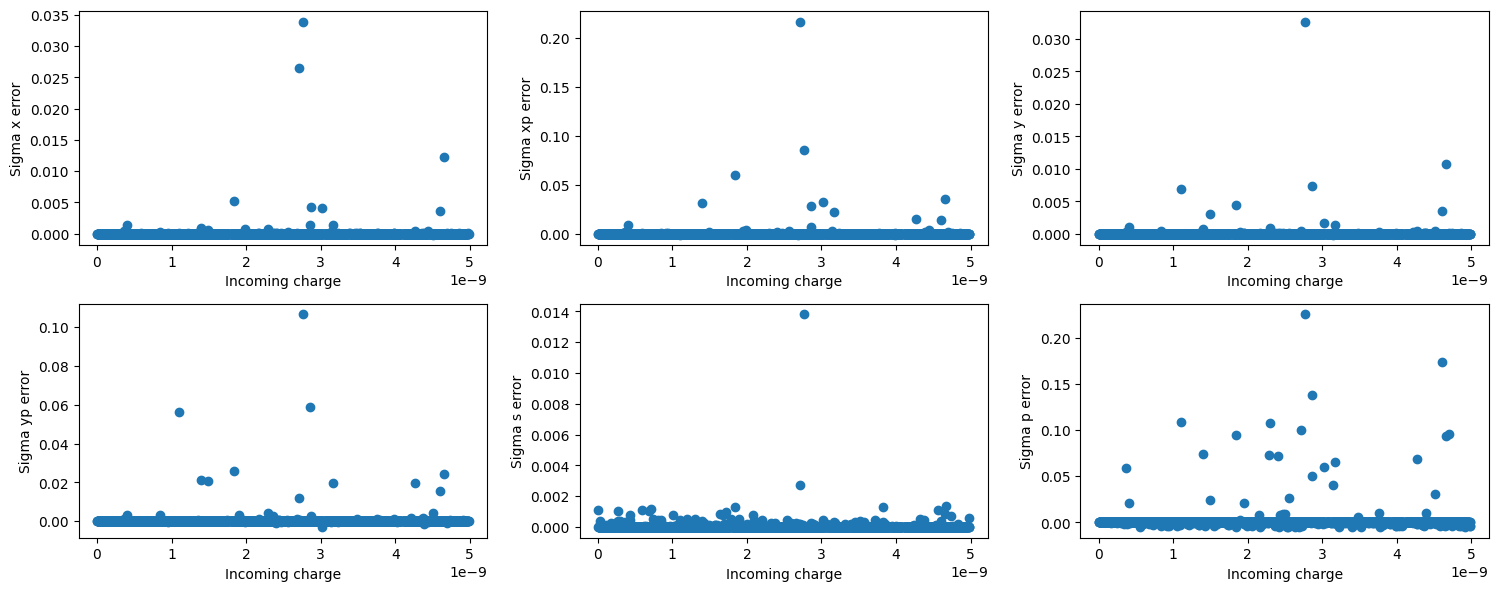

In [7]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(charges, sigma_x_errors)
plt.xlabel("Incoming charge")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(charges, sigma_xp_errors)
plt.xlabel("Incoming charge")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(charges, sigma_y_errors)
plt.xlabel("Incoming charge")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(charges, sigma_yp_errors)
plt.xlabel("Incoming charge")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(charges, sigma_s_errors)
plt.xlabel("Incoming charge")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(charges, sigma_p_errors)
plt.xlabel("Incoming charge")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

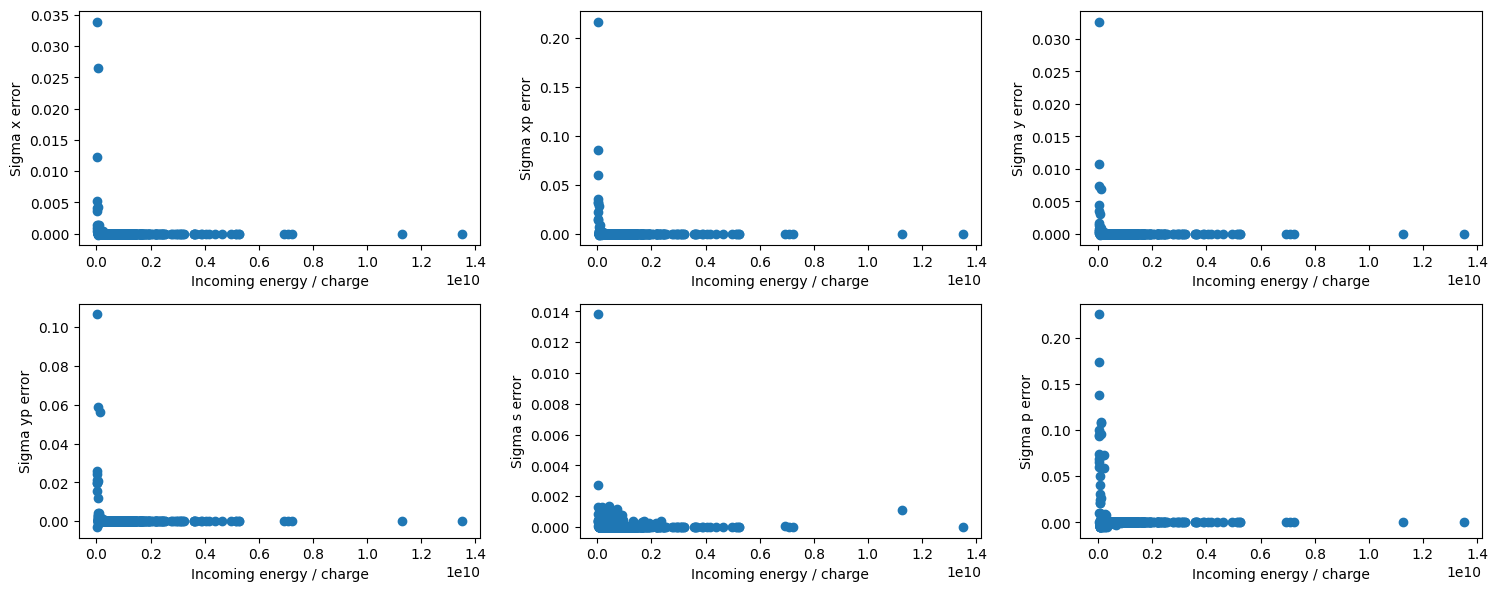

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(np.sqrt(np.array(energies) / np.array(charges)), sigma_x_errors)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(np.sqrt(np.array(energies) / np.array(charges)), sigma_xp_errors)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(np.sqrt(np.array(energies) / np.array(charges)), sigma_y_errors)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(np.sqrt(np.array(energies) / np.array(charges)), sigma_yp_errors)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(np.sqrt(np.array(energies) / np.array(charges)), sigma_s_errors)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(np.sqrt(np.array(energies) / np.array(charges)), sigma_p_errors)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()